<a href="https://colab.research.google.com/github/hkh9715/DL_for_everyone/blob/main/colab_02_Pima_Indian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# 파일 선택을 통해 예제 데이터를 내 컴퓨터에서 불러옵니다.
from google.colab import files
uploaded = files.upload()
my_data = r'pima-indians-diabetes.csv'

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 불러온 데이터셋을 적용합니다. 이 때 각 컬럼에 해당하는 이름을 지정합니다.
df = pd.read_csv(my_data,
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [14]:
# 처음 5줄을 봅니다.
print(df.head(768))

     pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0           6     148        72         35        0  33.6     0.627   50      1
1           1      85        66         29        0  26.6     0.351   31      0
2           8     183        64          0        0  23.3     0.672   32      1
3           1      89        66         23       94  28.1     0.167   21      0
4           0     137        40         35      168  43.1     2.288   33      1
..        ...     ...       ...        ...      ...   ...       ...  ...    ...
763        10     101        76         48      180  32.9     0.171   63      0
764         2     122        70         27        0  36.8     0.340   27      0
765         5     121        72         23      112  26.2     0.245   30      0
766         1     126        60          0        0  30.1     0.349   47      1
767         1      93        70         31        0  30.4     0.315   23      0

[768 rows x 9 columns]


In [10]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   BMI        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   class      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [12]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [13]:
# 데이터 중 임신 정보와 클래스 만을 출력해 봅니다.
print(df[['plasma', 'class']])

     plasma  class
0       148      1
1        85      0
2       183      1
3        89      0
4       137      1
..      ...    ...
763     101      0
764     122      0
765     121      0
766     126      1
767      93      0

[768 rows x 2 columns]


In [15]:
print(df[['pregnant','class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True))

    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


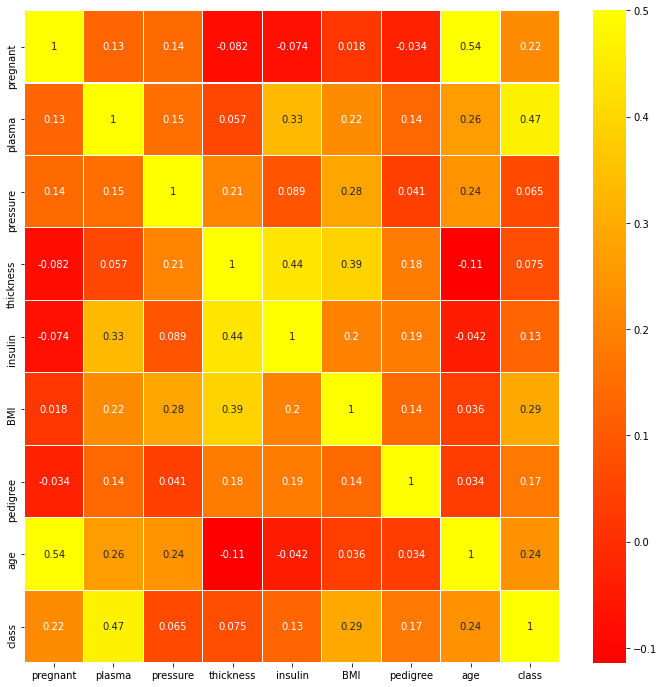

In [18]:
# 데이터 간의 상관관계를 그래프로 표현해 봅니다.

colormap = plt.cm.autumn   #그래프의 색상 구성을 정합니다.
plt.figure(figsize=(12,12))   #그래프의 크기를 정합니다.

# 그래프의 속성을 결정합니다. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시되게 합니다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

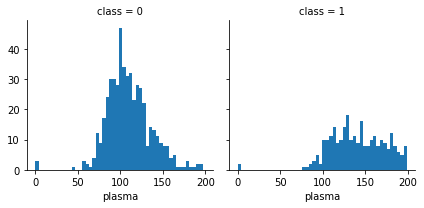

In [23]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=50)
plt.show()

In [24]:
# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 필요한 라이브러리를 불러옵니다.
import numpy
import tensorflow as tf

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
numpy.random.seed(3)
tf.random.set_seed(3)

# 데이터를 불러 옵니다.
dataset = numpy.loadtxt(my_data, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

# 모델을 설정합니다.
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델을 실행합니다.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과를 출력합니다.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))


Epoch 1/200
77/77 [==============================] - 0s 1ms/step - loss: 10.5440 - accuracy: 0.6159
Epoch 2/200
77/77 [==============================] - 0s 911us/step - loss: 5.4367 - accuracy: 0.6029
Epoch 3/200
77/77 [==============================] - 0s 1ms/step - loss: 2.9292 - accuracy: 0.5208
Epoch 4/200
77/77 [==============================] - 0s 986us/step - loss: 1.5346 - accuracy: 0.5208
Epoch 5/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8896 - accuracy: 0.5000
Epoch 6/200
77/77 [==============================] - 0s 1ms/step - loss: 0.8072 - accuracy: 0.5234
Epoch 7/200
77/77 [==============================] - 0s 908us/step - loss: 0.7655 - accuracy: 0.6549
Epoch 8/200
77/77 [==============================] - 0s 936us/step - loss: 0.7306 - accuracy: 0.6628
Epoch 9/200
77/77 [==============================] - 0s 1ms/step - loss: 0.6943 - accuracy: 0.6706
Epoch 10/200
77/77 [==============================] - 0s 955us/step - loss: 0.6656 - accuracy: 0.675

In [ ]:
from google.colab import drive
drive.mount('/content/drive')